In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
items = pd.read_csv('db/db.txt', sep="|")

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
items[['Price']] = sc.fit_transform(items[['Price']])

In [3]:
items.head(5)

,id,Title,Brand,Type,Sex,Size,SizeParams,SizeArray,Color,Country,Price,Image
0,1,Adidog / Одежда для собак мелких и средних пор...,Adidog,NaN,унисекс,для мелких пород,Российский размер;Размер производителя;Длина с...,"30,M,30;",красный,NaN,0.064743,images.wbstatic.net/c516x688/new/18260000/1826...
1,2,"OSSO-fashion / Комбинезон из флиса для собак, ...",OSSO-fashion,комбинезон,самец,для мелких пород,Российский размер;Размер производителя;Обхват ...,"28-flise,28,30-34,28-32,26,28;30-flise,30,32-3...",черный,Россия,0.109297,images.wbstatic.net/c516x688/new/6250000/62568...
2,3,"OSSO-fashion / Комбинезон из флиса для собак, ...",OSSO-fashion,комбинезон,самка,для мелких пород,Российский размер;Размер производителя;Обхват ...,"28-flise,28,30-34,28-32,26,28;30-flise,30,32-3...",бордовый,Россия,0.109297,images.wbstatic.net/c516x688/new/6250000/62568...
3,4,"OSSO-fashion / Жилет для собак ""Стёжка""",OSSO-fashion,жилет,самец; самка,для крупных пород; для средних пород,Российский размер;Размер производителя;Обхват ...,"37,37,55,37,37;40,40,61,37,40;45,45,65,47,45;5...",коричневый,Россия,0.136503,images.wbstatic.net/c516x688/new/15830000/1583...
4,5,OSSO-fashion / Зимний комбинезон для собак (ко...,OSSO-fashion,пакет,самец,для крупных пород; для средних пород,Российский размер;Размер производителя;Обхват ...,"40-1-bigsnow,40-1,60,46,40;40-2-bigsnow,40-2,7...",бежевый,Россия,0.246905,images.wbstatic.net/c516x688/new/14780000/1478...


In [41]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [4]:
items.isnull().sum()

id              0
Title           0
Brand           0
Type          150
Sex           375
Size          277
SizeParams      0
SizeArray       0
Color         261
Country       723
Price           0
Image           0
dtype: int64

In [6]:
# Если нет размера/пола - для всех
# Для остальных пропусков - заполнение нулями

In [16]:
import numpy as np

types = ['комбинезон', 'жилет', 'пакет', 'футболка', 'толстовка', 'пуховик',
         'свитер', 'куртка', 'дождевик', 'снуд', 'попона', 'платье', 'шуба', 
         'пальто', 'дубленка', 'костюм', 'пыльник', 'худи', 'плащ', 'халат',
         'майка', 'штаны', 'рубашка', 'сарафан', 'парка', 'косынка', 'повязка']

def get_type(typ, template) :
    typ_small = typ.lower()
    for elem in template:
        if typ_small.find(elem) != -1:
            return elem
    return 'unknown'

In [17]:
# -----Fix sex
sex_types_male = ['самец', 'кабель', 'унисекс', 'мужской', 'мальчик']
sex_types_female = ['самка', 'сука', 'унисекс', 'женский', 'девочка']

def get_type_bool(typ, template) :
    typ_small = typ.lower()
    for elem in template:
        if typ_small.find(elem) != -1:
            return 1
    return 0

In [18]:
size_types_small = ['мелк', 'все', 'мал']
size_types_middle = ['средн', 'все', 'небольш']
size_types_big = ['крупн', 'все', 'больш']

In [19]:
color_types_red = ['красн', 'малин', 'ал', 'бордов', 'кораллов', 'марсала']
color_types_brown = ['коричнев', 'какао', 'шоколад', 'терракот', 'бронз', 'вин', 'капучино']
color_types_orange = ['оранж', 'рыж', 'лососев']
color_types_beige = ['бежев', 'пудров', 'жемчужн', 'кремов', 'персик']
color_types_yellow = ['желт', 'золот', 'лимон', 'горчичн',]
color_types_white = ['бел', 'сер', 'серебр', 'прозрачн']
color_types_black = ['черн', 'графит', 'чернильн']
color_types_pink = ['роз', 'фиолет', 'сирен', 'лаванд', 'фуксия', 'лилов', 'сумеречн']
color_types_blue = ['син', 'голуб', 'васильков', 'лазурн', 'электрик']
color_types_green = ['зелен', 'салат', 'хаки', 'мят', 'оливк', 'изумруд',
                     'бирюз', 'лайм', 'камуфляж']

def get_type_color(typ) :
    typ_small = typ.lower()
    for elem in color_types_blue:
        if typ_small.find(elem) != -1:
            return 'синий'
    for elem in color_types_pink:
        if typ_small.find(elem) != -1:
            return 'розовый'
    for elem in color_types_white:
        if typ_small.find(elem) != -1:
            return 'белый'     
    for elem in color_types_red:
        if typ_small.find(elem) != -1:
            return 'красный'
    for elem in color_types_black:
        if typ_small.find(elem) != -1:
            return 'черный'
    for elem in color_types_orange:
        if typ_small.find(elem) != -1:
            return 'оранжевый'   
    for elem in color_types_green:
        if typ_small.find(elem) != -1:
            return 'зеленый'
    for elem in color_types_yellow:
        if typ_small.find(elem) != -1:
            return 'желтый'
    for elem in color_types_brown:
        if typ_small.find(elem) != -1:
            return 'коричневый'   
    for elem in color_types_beige:
        if typ_small.find(elem) != -1:
            return 'бежевый'          
    
    return 'unknown'

In [20]:
#Не хочу нормализовать цену

In [21]:
# Функция для генерации вектора

# from sklearn.preprocessing import MinMaxScaler

def get_vector(items_matrix):

    d = {'brand': items_matrix['Brand'], 'price': items_matrix['Price']}
    items_int = pd.DataFrame(data=d)
    
    items_int[['type']] = items_matrix.apply(lambda x: get_type(str(x['Type']), types), axis=1)
    
    items_int[['sex_male']] = items_matrix.apply(lambda x: get_type_bool(str(x['Sex']), sex_types_male), axis=1)
    items_int[['sex_female']] = items_matrix.apply(lambda x: get_type_bool(str(x['Sex']), sex_types_female), axis=1)

    items_int[['size_small']] = items_matrix.apply(lambda x: get_type_bool(str(x['Size']), size_types_small), axis=1)
    items_int[['size_middle']] = items_matrix.apply(lambda x: get_type_bool(str(x['Size']), size_types_middle), axis=1)
    items_int[['size_big']] = items_matrix.apply(lambda x: get_type_bool(str(x['Size']), size_types_big), axis=1)
    
    items_int[['color']] = items_matrix.apply(lambda x: get_type_color(str(x['Color'])), axis=1)
    
#     sc = MinMaxScaler()
#     items_int[['price']] = sc.fit_transform(items_matrix[['Price']])
    
    res = pd.get_dummies(items_int)
    
    if 'color_unknown' in res.columns:
        res = res.drop(['color_unknown'], axis=1)
    if 'type_unknown' in res.columns:
        res = res.drop(['type_unknown'], axis=1)    
  
    return res

In [34]:
%%time
items_vector = get_vector(items)

CPU times: user 907 ms, sys: 5.92 ms, total: 913 ms
Wall time: 915 ms


In [35]:
len(items_vector.columns)

134

In [101]:
items_vector.index = items['id']
items_vector

,price,sex_male,sex_female,size_small,size_middle,size_big,brand_Adidog,brand_Ani moll,brand_Arnydog,brand_BARSU,...,color_бежевый,color_белый,color_желтый,color_зеленый,color_коричневый,color_красный,color_оранжевый,color_розовый,color_синий,color_черный
id,,,,,,,,,,,,,,,,,,,,,
1,0.064743,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.109297,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.109297,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.136503,1,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.246905,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,0.089189,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2298,0.223247,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2299,0.089189,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
x = [items_vector.iloc[0]]
print(x)

[sex_male           1.0
sex_female         1.0
size_small         1.0
size_middle        0.0
size_big           0.0
                  ... 
color_красный      1.0
color_оранжевый    0.0
color_розовый      0.0
color_синий        0.0
color_черный       0.0
Name: 1, Length: 134, dtype: float64]


In [14]:
# Фигачим класс для высчитывания ближайших значений

class GetKNearestNeighbours:
    
    def __init__(self, X_matrix, X_ids=[]):
        self._X_matrix = X_matrix
        self.df = pd.DataFrame({
            'id': pd.Series(X_ids, dtype='int'),
            'dist': pd.Series([], dtype='float'),
        })
        self.similarity_matrix = pd.DataFrame()
        
       
    def neighbours_for_single_object(self, K: int, X_matrix_object):
        
        dist = cosine_similarity(self._X_matrix, X_matrix_object)
        dist = pd.DataFrame(dist, columns=['dist'])
        self.df['dist'] = dist['dist']
        res = self.df.sort_values(by='dist', ascending=False)
        res = res.head(K)
#         res = res[1:]
        return res
    

    def all_neighbours_for_single_object(self, X_matrix_object):
        
        dist = cosine_similarity(self._X_matrix, X_matrix_object)
        dist = pd.DataFrame(dist, columns=['dist'])
        self.df['dist'] = dist['dist']
        return self.df
    
    
    def get_similarity_matrix(self):
        self.similarity_matrix = pd.DataFrame()
        for i in range (len(self._X_matrix)):
            print(i, end='\r')
            res = self.all_neighbours_for_single_object([self._X_matrix.iloc[i]])
            self.similarity_matrix[i+1] = res['dist']
          
        self.similarity_matrix.index = self.df['id']
        print('\n----------------------\nReady\n')  
        
        
     # Получаем похожих по матрице схожести
    def neighbours_by_similarity_matrix(self, K, item_id):
        if item_id > len(self.similarity_matrix):
            return ''
        res = pd.DataFrame({'dist':self.similarity_matrix[item_id]})
        res = res.sort_values(by='dist', ascending=False)
        res = res.head(K)
        return res[1:]       
        

In [39]:
items_ids = items['id']
getKnn = GetKNearestNeighbours(items_vector, items_ids)

In [103]:
res = getKnn.neighbours_for_single_object(15, [items_vector.iloc[0]])
res

,id,dist
0,1,1.000000
215,216,0.999940
1460,1461,0.800184
203,204,0.800183
583,584,0.800178
816,817,0.800168
202,203,0.800159
22,23,0.800145
1734,1735,0.797698
893,894,0.795505


In [19]:
table = res.set_index('id').join(items.set_index('id'))
table.drop(['Title', 'SizeParams', 'SizeArray', 'Country', 'Image'], axis=1)

,dist,Brand,Type,Sex,Size,Color,Price
id,,,,,,,
1,1.000000,Adidog,NaN,унисекс,для мелких пород,красный,1190
216,0.999940,Adidog,NaN,унисекс,для мелких пород,красный,1500
1461,0.800184,Орлова Екатерина,NaN,унисекс,для мелких пород,алый,1300
204,0.800183,Adidog,NaN,унисекс,для средних пород,красный,1290
584,0.800178,Орлова Екатерина,NaN,унисекс,для мелких пород,малиновый,1250
817,0.800168,Adidog,NaN,унисекс,для мелких пород,серый,1190
203,0.800159,Орлова Екатерина,NaN,унисекс,для мелких пород,темно-красный,1150
23,0.800145,Орлова Екатерина,NaN,унисекс,для мелких пород,бордовый,1100
1735,0.797698,COLLAR,NaN,унисекс,для мелких пород,"красный, черный",3647


In [20]:
%%time
res = getKnn.neighbours_for_single_object(15, [items_vector.iloc[1]])
table = res.set_index('id').join(items.set_index('id'))
table.drop(['Title', 'SizeParams', 'SizeArray', 'Country', 'Image'], axis=1)

CPU times: user 60.9 ms, sys: 23.7 ms, total: 84.6 ms
Wall time: 51.8 ms


,dist,Brand,Type,Sex,Size,Color,Price
id,,,,,,,
2,1.000000,OSSO-fashion,комбинезон,самец,для мелких пород,черный,1755
148,0.800456,OSSO-fashion,комбинезон,самец,для мелких пород,синий,1700
330,0.800456,OSSO-fashion,комбинезон,самец,для мелких пород,"серый, зеленая груша",1700
121,0.800456,OSSO-fashion,комбинезон,самец,для мелких пород,какао,1700
287,0.800357,DOGMODA,комбинезон,самец,для мелких пород,черный,1500
1279,0.800357,Brenda's pet,комбинезон,самец,для мелких пород,чернильный,1500
1745,0.800357,Patrik,комбинезон,самец,для мелких пород,черный,1500
205,0.800357,OSSO-fashion,комбинезон,самец,для мелких пород,голубой,1500
240,0.800116,Yoriki,комбинезон,самец,для мелких пород,черный,3026


In [21]:
### Ну короче
# Ближайших мы находим
# Молодцы блин

###-------------------------------------------------------------------

##-------------------------------------------------------------------

#-----------------------------------------------------------------

In [22]:
import sys
print ('items = ', sys.getsizeof(items)/1024.0, ' kb')
print ('vector_items = ', sys.getsizeof(items_vector)/1024.0, ' kb')

items =  2836.7177734375  kb
vector_items =  395.6328125  kb


In [23]:
# Матрица схожести всех товаров (2301*2301)

In [24]:
# %%time
# getKnn.get_similarity_matrix()

2300
----------------------
Ready

CPU times: user 3min 7s, sys: 27.3 s, total: 3min 35s
Wall time: 1min 4s


In [25]:
getKnn.similarity_matrix.shape

(2301, 2301)

In [26]:
getKnn.similarity_matrix.head(10)

,1,2,3,4,5,6,7,8,9,10,...,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301
id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.400769,0.600446,0.338962,0.184480,0.600421,0.507674,0.366011,0.507698,0.547968,...,0.400668,0.400620,0.365221,0.224581,0.200911,0.200911,0.225344,0.200911,0.202000,0.001289
2,0.400769,1.000000,0.600953,0.339726,0.367770,0.401667,0.508638,0.184666,0.339726,0.547948,...,0.401151,0.401033,0.367913,0.225293,0.401151,0.401151,0.005416,0.201549,0.402388,0.002175
3,0.600446,0.600953,1.000000,0.339726,0.186333,0.800531,0.508638,0.548877,0.508331,0.547948,...,0.600754,0.201404,0.548221,0.225293,0.201549,0.201549,0.227378,0.401151,0.204713,0.002175
4,0.338962,0.339726,0.339726,1.000000,0.618453,0.171487,0.430520,0.618247,0.857522,0.309180,...,0.170726,0.170567,0.312436,0.190839,0.339398,0.339398,0.193282,0.339398,0.341514,0.190839
5,0.184480,0.367770,0.186333,0.618453,1.000000,0.005759,0.466345,0.667652,0.618453,0.167829,...,0.003997,0.185178,0.178955,0.207361,0.367016,0.367016,0.212967,0.185506,0.373970,0.207361
6,0.600421,0.401667,0.800531,0.171487,0.005759,1.000000,0.508994,0.367055,0.340014,0.547872,...,0.600823,0.201625,0.549259,0.225574,0.201800,0.201800,0.228230,0.401311,0.205863,0.002558
7,0.507674,0.508638,0.508638,0.430520,0.466345,0.508994,1.000000,0.311041,0.430520,0.617034,...,0.508228,0.339530,0.619054,0.379749,0.339725,0.508228,0.007567,0.508228,0.343585,0.003039
8,0.366011,0.184666,0.548877,0.618247,0.667652,0.367055,0.311041,1.000000,0.772134,0.167468,...,0.184268,0.001905,0.336973,0.205977,0.184268,0.184268,0.410987,0.366446,0.187978,0.205977
9,0.507698,0.339726,0.508331,0.857522,0.618453,0.340014,0.430520,0.772134,1.000000,0.309180,...,0.170726,0.170567,0.312436,0.190839,0.339398,0.339398,0.380849,0.339398,0.341514,0.190839


In [27]:
%%time
res = getKnn.neighbours_by_similarity_matrix(15, 1)
res

CPU times: user 7.31 ms, sys: 480 µs, total: 7.79 ms
Wall time: 10.3 ms


,dist
id,
216,0.999940
1461,0.800184
204,0.800183
584,0.800178
817,0.800168
203,0.800159
23,0.800145
1735,0.797698
894,0.795505


In [28]:
print ('similarity_matrix = ', sys.getsizeof(getKnn.similarity_matrix)/1024/1024, ' mb')
#чет много

similarity_matrix =  40.41217803955078  mb


#------------------------------------------------------------------------------------------------------------------------------

In [29]:
# Сколько времени на векторизацию нового элемента

In [30]:
one_item = items
one_item = one_item.drop(one_item[one_item.id>1].index)

In [31]:
# векторизировать одну новцю строку
one_item_vector = get_vector(one_item)
for col in items_vector.columns:
    if col not in one_item_vector.columns:
        one_item_vector[col] = [0]
one_item_vector

,sex_male,sex_female,size_small,size_middle,size_big,price,brand_Adidog,color_красный,brand_Ani moll,brand_Arnydog,...,type_шуба,color_бежевый,color_белый,color_желтый,color_зеленый,color_коричневый,color_оранжевый,color_розовый,color_синий,color_черный
0,1,1,1,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#  Найти для нее похожих
res = getKnn.all_neighbours_for_single_object(one_item_vector)
res.shape
# Похожие слегка не те, тк не учитывается цена, тк ее не получается нормализовать. Но мне уже пофиг

(2301, 2)

In [33]:
ivan_matrix = getKnn.similarity_matrix
ivan_matrix.shape

(2301, 2301)

In [34]:
ivan_matrix[2500] = res['dist']

In [35]:
res2 = res.T
res2 = res2.drop(['id'])

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------


In [36]:
# Пытаемся шаманить с коллаборативной фильтрацией

In [25]:
acqs = pd.read_csv('db/comments.txt', sep="|")
acqs.head()

,id,userId,itemId,date
0,1,1,1149,2020-12-13 09:22:54
1,2,2,121,2020-12-21 15:30:42
2,3,3,23,2019-12-15 19:19:24
3,4,3,469,2019-12-12 16:13:33
4,5,4,485,2017-12-01 22:58:26


In [5]:
acqs.isnull().sum()

id        0
userId    0
itemId    0
date      0
dtype: int64

<AxesSubplot:xlabel='userId', ylabel='itemId'>

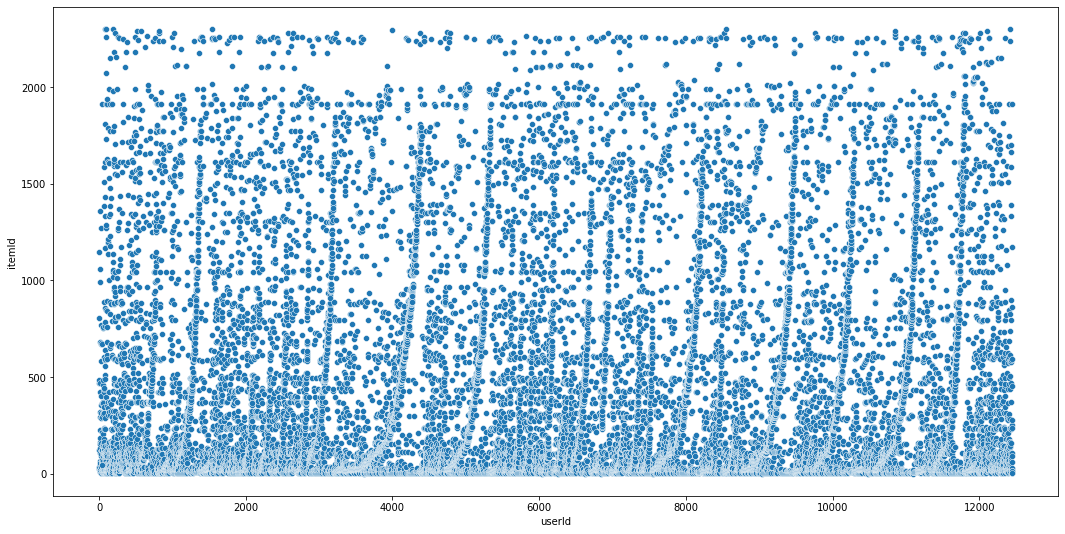

In [39]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.scatterplot(ax=ax, x='userId', y='itemId', data=acqs)

/home/ivan/Diplom/DataAnalysis/my_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='itemId', ylabel='Density'>

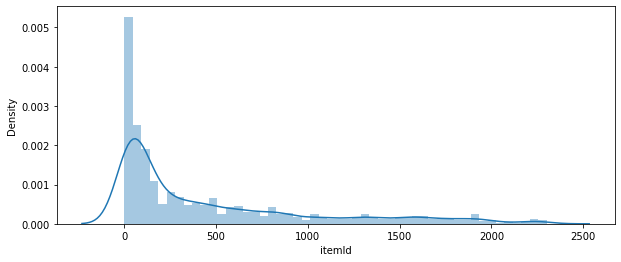

In [40]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.distplot(acqs['itemId'])
#Потому что товары собирались по порядку, представленному на сайте, т.е. по популярности

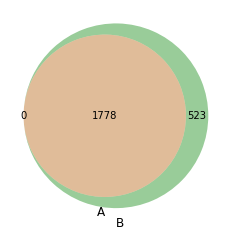

In [41]:
#Часть товаров еще не покупалась
from matplotlib_venn import venn2
venn2([set(acqs['itemId'].unique()), set(items['id'].unique())])

In [42]:
print ("Среднее число покупок на товар = ", len(acqs)/len(acqs['itemId'].unique()))
print ("Среднее число покупок на пользователя = ", len(acqs)/len(acqs['userId'].unique()))

Среднее число покупок на товар =  11.597862767154107
Среднее число покупок на пользователя =  1.6565713367609254


In [43]:
# План
# Нет пока плана
# Пока делаем матрицу взаимодействия

In [186]:
# Тут надо будет выкинуть товары, которые никогда не покупались
# items = pd.read_csv('db/db.txt', sep="|")
items_in_acqs = items[items['id'].isin(acqs['itemId'])]
items_in_acqs.shape

(1778, 12)

In [22]:
def get_utility_martix(data):
    
    userList = data['userId'].tolist()
    itemList = data['itemId'].tolist()

    userList = list(set(userList))
    itemList = list(set(itemList))
    itemList.sort()

    X = pd.DataFrame({item: [0 for i in range(len(userList))] for item in itemList})
    X.index = userList
    
    number = 0
    for i, row in data.iterrows():
        print (i, end='\r')
        X[row['itemId']][row['userId']] = 1
        number+=1
    print('added items = ', number)
    
    return X

In [26]:
%%time
user_item_matrix = get_utility_martix(acqs)
user_item_matrix.shape

added items =  20621
CPU times: user 53.2 s, sys: 3.19 s, total: 56.4 s
Wall time: 52.9 s


(12448, 1778)

In [179]:
user_item_matrix

,1,2,3,4,5,6,7,8,9,10,...,2277,2278,2281,2286,2288,2291,2294,2299,2300,2301
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Матрица есть, молодцы

In [149]:
# Мини-бд для проверки
small_acq = acqs
small_acq = small_acq.drop(small_acq[small_acq.id>100].index)

# Миниматрица для проверок
mini_matrix = get_utility_martix(small_acq)
mini_matrix

added items =  100


,2,3,4,5,8,10,15,19,20,23,...,758,771,806,992,1058,1149,1269,1359,1588,1912
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
mini_matrix.shape

(69, 75)

In [27]:
class GetKNearestUsers(GetKNearestNeighbours):
    
    def __init__(self, X_matrix, X_ids=[]):
        super().__init__(X_matrix, X_ids)
       
    
    def neighbours_for_single_user(self, K: int, X_matrix_object):
        
        res = self.neighbours_for_single_object(K, X_matrix_object) #индекс, не айдишник (с 0)
        res = res.drop(res[res.dist==0].index) #Убираем пользователей с расстоянием 0
        return res

In [28]:
user_item_matrix.shape

(12448, 1778)

In [171]:
user_item_matrix_new = user_item_matrix
user_item_matrix_new['total'] = user_item_matrix_new.sum(axis=1)

In [172]:
user_item_matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,2278,2281,2286,2288,2291,2294,2299,2300,2301,total
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
user_item_matrix_new = user_item_matrix_new.drop(user_item_matrix_new[user_item_matrix_new.total<2].index)
user_item_matrix_new.shape

In [177]:
user_item_matrix_new.head()

,1,2,3,4,5,6,7,8,9,10,...,2277,2278,2281,2286,2288,2291,2294,2299,2300,2301
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
user_item_matrix_new = user_item_matrix_new.drop(['total'], axis=1)

In [25]:
getKnnUsers = GetKNearestUsers(mini_matrix, mini_matrix.index)

In [26]:

res = getKnnUsers.neighbours_for_single_user(25, [mini_matrix.iloc[1]]) #индекс, не айдишник (с 0)

# res = res.drop(res[res.dist==1].index)

# Муть для демонстрации работы
for user in res.iterrows():
    
    user_id = int(user[1]['id'])
    print ('\n', user_id, "  dist:", user[1]['dist'], end=' ')
    print ("  items: ", end = ' ')
    
    comms = acqs['userId'][acqs['userId'] == user_id ]
    for com in comms.index:
        iii = acqs['itemId'][com]
        print (iii, end=' ')


 2   dist: 1.0   items:  121 
 42   dist: 1.0   items:  121 
 43   dist: 0.7071067811865475   items:  118 121 
 64   dist: 0.5773502691896258   items:  20 1588 121 

In [54]:
# Пытаемся предсказать оценки наивным способом

In [29]:
# Функция для выковыривания товаров пользователя

def get_all_items_of_one_user(user_id):
    comms = acqs['userId'][acqs['userId']==user_id]
    items_list = []
    for com in comms.index:
        items_list.append(acqs['itemId'][com])
    return items_list     

In [30]:
get_all_items_of_one_user(300)

[20, 72]

In [63]:
user_item_predicted

,19,20,23,37,46,65,121,134,156,164,225,317,421,469,485,806,992,1058,1149
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [38]:

def Count_K_UserBased(K, u_i_matrix, u_i_matrix_small, acqq_matrix):
    
    K_max = 30
#     getKnnUsersTest = GetKNearestUsers(u_i_matrix_small, u_i_matrix_small.index)

#     userList = list(set(u_i_matrix.index.tolist())) # Список айдишников пользователей
#     smth = np.zeros((len(userList), K_max))
#     print('Get empty smth')

#     u=0
#     for user in u_i_matrix.iterrows():
#         print(u, end='\r')
#         u+=1
#         res = getKnnUsersTest.neighbours_for_single_user(K_max, [user[1]])
#         res_list = res['id'].values.tolist()
        
#         if user[0] in res_list:
#             res_list.remove(user[0])
#     #     ----массив похожих пользователей 
#         smth[user[0]-1][0:len(res_list)] = np.array(res_list) # Добавили в нашу матрицу
#     print('Filled smth')  
    
#     saved_smth = smth.copy()
    
#     return saved_smth

    smth = Neibors_Saved.copy()
    print('copied!')
    
    for i in range(len(smth)):
        new = [0] * K_max
        new[0:K] = smth[i][0:K] 
        smth[i] = new

        
    itemList = list(set(acqq_matrix['itemId'].tolist()))
    itemList.sort()

    predicted_list = []
    # Сделали пустую матрицу для предсказаний    
    print('Get empty predicted list')

    
    for jj in range(len(smth)):
        print(jj, end='\r')
        similar_users = smth[jj]
        items_for_user = []
        
        for one_sim_user_id in similar_users:   
            if one_sim_user_id == 0:
                continue
            items_for_user.extend(get_all_items_of_one_user(one_sim_user_id))
            
    #   В items_for_user все товары с повторениями    
        

        if len(items_for_user) == 0:
            predicted_list.append([])

    #   Если у нас есть товары для пользователя        
        else:    
            items_set = list(set(items_for_user))
            items_arr = []
            for i in items_set:
                items_arr.append([i, items_for_user.count(i)])

            df = pd.DataFrame(items_arr, columns=['itemId', 'koef'])
            df['koef'] = df['koef']/K
            df = df.sort_values(by='koef', ascending=False)
            
            predicted_list.append(list(df['itemId']))

    print('\n')
    return predicted_list

In [297]:
from sklearn.metrics import f1_score 

def count_f1_score(true_matrix, pred_list):

    f1_sc_list = []
    print('Total = ', len(pred_list))
    
    for item_list_id in range(0, len(pred_list), 8): # Цикл по пользователям 
        print(item_list_id, end = '\r')
        item_list = pred_list[item_list_id]
        
        f1_sc = 0
        if len(item_list)>0:
            pred_matrix = pd.DataFrame({item: [0] for item in true_matrix.columns})
            
            for iitem in item_list:
                pred_matrix[iitem][0] = 1
            f1_sc = f1_score(true_matrix.iloc[item_list_id], pred_matrix.iloc[0])
       
    
        f1_sc_list.append(f1_sc)

#     print(f1_sc_list)
    if len(f1_sc_list)>0:
        return sum(f1_sc_list)/len(f1_sc_list)
    else:
        return 0

In [302]:
from sklearn.metrics import precision_score

def count_MOR_score(true_matrix, pred_list):
    
    mor_list = []
    print('Total = ', len(pred_list))
    
    for item_list_id in range(0, len(pred_list), 16): # Цикл по пользователям 
        print(item_list_id, end = '\r')
        item_list = pred_list[item_list_id]
        
        ap_k = 0
        KK = min(10, len(item_list)) 
        
        if KK>0:
            ap_k_sum = 0 # Для одного пользователя - НЕ МЕРА, ТОЛЬКО СУММА
            for _k_id in range(KK):
                _k = _k_id+1    
                if list(true_matrix[item_list[_k_id]])[item_list_id] == 1:

                    first_k = item_list[0:_k]
                    first_k_row = pd.DataFrame({item: [0] for item in true_matrix.columns})
            
                    for iitem in first_k:
                        first_k_row[iitem][0] = 1
                    p_k = precision_score(true_matrix.iloc[item_list_id], first_k_row.iloc[0])
                    ap_k_sum+=p_k
                    
            ap_k = ap_k_sum/KK 
        mor_list.append(ap_k)

    if len(mor_list)>0:
        return sum(mor_list)/len(mor_list)
    else:
        return 0

In [296]:
from sklearn.metrics import recall_score

def count_recall_score(true_matrix, pred_list):

    recall_sc_list = []
    print('Total = ', len(pred_list))
    
    for item_list_id in range(0, len(pred_list), 8): # Цикл по пользователям 
        print(item_list_id, end = '\r')
        item_list = pred_list[item_list_id]
        
        recall_sc = 0
        if len(item_list)>0:
            pred_matrix = pd.DataFrame({item: [0] for item in true_matrix.columns})
            
            for iitem in item_list:
                pred_matrix[iitem][0] = 1
            recall_sc = recall_score(true_matrix.iloc[item_list_id], pred_matrix.iloc[0])
       
    
        recall_sc_list.append(recall_sc)

#     print(f1_sc_list)
    if len(recall_sc_list)>0:
        return sum(recall_sc_list)/len(recall_sc_list)
    else:
        return 0

In [151]:
# Мини-бд для проверки
text_acq = acqs
text_acq = text_acq.drop(text_acq[text_acq.id>10000].index)

# Миниматрица для проверок
test_mini_matrix = get_utility_martix(text_acq)

added items =  10000


In [634]:
print(text_acq.shape)
print(test_mini_matrix.shape)

(10000, 4)
(6032, 1335)


In [35]:
test_mini_matrix_new = test_mini_matrix.copy()
test_mini_matrix_new['total'] = test_mini_matrix_new.sum(axis=1)

test_mini_matrix_new = test_mini_matrix_new.drop(test_mini_matrix_new[test_mini_matrix_new.total<2].index)
test_mini_matrix_new = test_mini_matrix_new.drop(['total'], axis=1)
test_mini_matrix_new.shape

(2677, 1335)

In [48]:
# Супер-убийственный тест, погнали
# test_results = []
# K_list = [2, 4, 6, 10, 15, 20, 25]
K_list = [35, 50]

In [36]:
Neibors_Saved = Count_K_UserBased(1, test_mini_matrix, test_mini_matrix_new, text_acq)
print('Ok\n')  

Get empty smth
Filled smth
Ok



In [56]:
for k in K_list:
    
    print("\n\nk =", k, '---------------------------------')

    fff = Count_K_UserBased(k, test_mini_matrix, test_mini_matrix_new, text_acq)
    print('Ok\n')  

    numm = 0
    for iff in fff:
        numm += len(iff)
    n = numm/len(fff)
    print('\nn = ', n)  

    mor = count_MOR_score(test_mini_matrix, fff)
    print('\nMor = ', mor)

    f1 = count_f1_score(test_mini_matrix, fff)
    print('\nF1 = ', f1)

    recall = count_recall_score(test_mini_matrix, fff)
    print('\nRecall = ', recall)
    
    print('\n-----Res-----\n', k, n, mor, f1, recall, '\n------------------------')

    test_results.append([k, n, mor, f1, recall])



k = 35 ---------------------------------
copied!
Get empty predicted list
6031

Ok


n =  17.79724801061008
Total =  6032
6030
Mor =  0.15785343071185837
Total =  6032
6030
F1 =  0.18347793857665592
Total =  6032
6030
Recall =  0.8989104406130266

-----Res-----
 35 17.79724801061008 0.15785343071185837 0.18347793857665592 0.8989104406130266 
------------------------


k = 50 ---------------------------------
copied!
Get empty predicted list
6031

Ok


n =  17.79724801061008
Total =  6032
6030
Mor =  0.15785343071185837
Total =  6032
6030
F1 =  0.18347793857665592
Total =  6032
6030
Recall =  0.8989104406130266

-----Res-----
 50 17.79724801061008 0.15785343071185837 0.18347793857665592 0.8989104406130266 
------------------------


In [8]:
# -----------------------------User-Based ---------------------------------

In [147]:
# Мини-бд для проверки
text_acq = acqs
text_acq = text_acq.drop(text_acq[text_acq.id>10000].index)

# Миниматрица для проверок
test_mini_matrix = get_utility_martix(text_acq)

NameError: name 'get_utility_martix' is not defined

In [11]:
print(text_acq.shape)
print(test_mini_matrix.shape)

(10000, 4)
(6032, 1335)


In [22]:
test_mini_matrix_new = test_mini_matrix.copy()

In [23]:
test_mini_matrix_new = pd.DataFrame(test_mini_matrix_new.loc[:, ~(test_mini_matrix_new.sum() == 1)])

In [24]:
test_mini_matrix_new['total'] = test_mini_matrix_new.sum(axis=1)
test_mini_matrix_new = test_mini_matrix_new.drop(test_mini_matrix_new[test_mini_matrix_new.total<1].index)
test_mini_matrix_new = test_mini_matrix_new.drop(['total'], axis=1)
test_mini_matrix_new.shape

(5814, 835)

In [126]:
#------------------------------------------
# Мини-бд для проверки
small_acq = acqs
small_acq = small_acq.drop(small_acq[small_acq.id>20].index)

# Миниматрица для проверок
mini_matrix = get_utility_martix(small_acq)

NameError: name 'get_utility_martix' is not defined

In [127]:
class GetKNearestItems(GetKNearestNeighbours):
    
    def __init__(self, X_matrix, X_ids=[]):
        super().__init__(X_matrix.T, X_ids)
       
    
    def neighbours_for_single_item(self, K: int, X_matrix_object):
        res = self.neighbours_for_single_object(K, X_matrix_object) #индекс, не айдишник (с 0)
        res = res.drop(res[res.dist==0].index) #Убираем пользователей с расстоянием 0
        return res

In [45]:
getKnnItems = GetKNearestItems(mini_matrix, mini_matrix.columns)

In [77]:
res = getKnnItems.neighbours_for_single_item(10, [mini_matrix[134]]) #айдишник
res

,id,dist
9,164,1.000000
7,134,1.000000
1,20,0.707107


In [119]:
import numpy as np

def Get_Nearest_Items_List(u_i_matrix, u_i_matrix_small, acqq_matrix):
    
    K_max = 30
    
    getKnnItemsTest = GetKNearestItems(u_i_matrix_small, u_i_matrix_small.columns)

    itemList = list(set(u_i_matrix.columns.tolist())) # Список айдишников пользователей
    smth = np.zeros((len(itemList), K_max), dtype=int)
    print('Get empty smth')

    u=0
    for iitem in u_i_matrix.T.iterrows():
        print(u, end='\r')
        u+=1
        res = getKnnItemsTest.neighbours_for_single_item(K_max, [iitem[1]])
        res_list = res['id'].values.tolist()
        
        if iitem[0] in res_list:
            res_list.remove(iitem[0])
    #     ----массив похожих товаров
        smth[u-1][0:len(res_list)] = np.array(res_list) # Добавили в нашу матрицу
    print('Filled smth')  
    
    saved_smth = smth.copy()
    
    return saved_smth

In [165]:
def Count_K_ItemBased(K, u_i_matrix, u_i_matrix_small, acqq_matrix):
    
    K_max = 30

    smth = Item_Neibors_Saved.copy()
    print('copied!')
    
    for i in range(len(smth)):
        new = [0] * K_max
        new[0:K] = smth[i][0:K] 
        smth[i] = new
    
    smth_df = pd.DataFrame(smth)
    smth_df.index = u_i_matrix.columns
    smth_df = smth_df.T
    

    predicted_list = []
    # Сделали пустую матрицу для предсказаний    
    print('Get empty predicted list')
    
    
    userList = list(u_i_matrix.index)
    
    for user_id in userList:
        print(user_id, end='\r')
        
        user_bought_list = get_all_items_of_one_user(user_id)
        items_for_user = []
                
        for one_bought in user_bought_list:
            items_for_user.extend(list(smth_df[one_bought]))
            
        
        items_set = list(set(items_for_user))
        items_arr = []
        
        for i in items_set:
            items_arr.append([i, items_for_user.count(i)])
            
        df = pd.DataFrame(items_arr, columns=['itemId', 'koef'])
        df['koef'] = df['koef']/K
        df = df.sort_values(by='koef', ascending=False)
        
        res = list(df['itemId'])
        
        if 0 in res:
            res.remove(0) 
            
        predicted_list.append(res)    
                      
        
#         items_for_user = list(set(items_for_user))
#         if 0 in items_for_user:
#             items_for_user.remove(0)

#         predicted_list.append( items_for_user)

    print('\n')
    return predicted_list

In [161]:
test_results = []

In [168]:
# K_list = [2, 4, 6, 10, 15, 20, 25, 35, 50]
K_list = [15, 20, 25, 35, 50]

In [154]:
# Item_Neibors_Saved = Get_Nearest_Items_List(test_mini_matrix, test_mini_matrix, text_acq)

Get empty smth
Filled smth


In [172]:
for k in K_list:
    
    print("\n\nk =", k, '---------------------------------')
    
    uuu = Count_K_ItemBased(k, test_mini_matrix, test_mini_matrix_new, text_acq)
    print('Ok\n')  

    numm = 0
    for iff in uuu:
        numm += len(iff)
    n = numm/len(uuu)
    print('\nn = ', n)  

    mor = count_MOR_score(test_mini_matrix, uuu)
    print( '\nMor = ', mor)

    f1 = count_f1_score(test_mini_matrix, uuu)
    print('\nF1 = ', f1)

    recall = count_recall_score(test_mini_matrix, uuu)
    print('\nRecall = ', recall)
    
    print('\n-----Res-----\n', k, n, mor, f1, recall, '\n------------------------')

    test_results.append([k, n, mor, f1, recall])



k = 15 ---------------------------------
copied!
Get empty predicted list
6032

Ok


n =  18.054210875331567
Total =  6032
6028
Mor =  0.033841633359798395
Total =  6032
6028
F1 =  0.07343405276412436
Total =  6032
6028
Recall =  0.38279177718832874

-----Res-----
 15 18.054210875331567 0.033841633359798395 0.07343405276412436 0.38279177718832874 
------------------------


k = 20 ---------------------------------
copied!
Get empty predicted list
6032

Ok


n =  22.58322281167109
Total =  6032
6028
Mor =  0.03342141421113098
Total =  6032
6028
F1 =  0.06529375006164011
Total =  6032
6028
Recall =  0.40251989389920423

-----Res-----
 20 22.58322281167109 0.03342141421113098 0.06529375006164011 0.40251989389920423 
------------------------


k = 25 ---------------------------------
copied!
Get empty predicted list
6032

Ok


n =  26.611571618037136
Total =  6032
6028
Mor =  0.033340338677469224
Total =  6032
6028
F1 =  0.05994078246372872
Total =  6032
6028
Recall =  0.4140141467727675

In [6]:
test_results_itemBased = [[2, 0.07007705032720411, 0.13289253145997607, 0.18487879457707052, 3.0295092838196287],
 [4, 0.042696349971981164, 0.11952557387677869, 0.2543674476864129, 5.739058355437666],
 [6, 0.03689093442723882, 0.10647105132707044, 0.2981459991158266, 8.263759946949602],
 [10, 0.036305531391994834, 0.08792567824062882, 0.3473253757736514, 12.905835543766578],
 [15, 0.033841633359798395, 0.07343405276412436, 0.38279177718832874, 18.054210875331567],
 [20, 0.03342141421113098, 0.06529375006164011, 0.40251989389920423, 22.58322281167109],
 [25, 0.033340338677469224, 0.05994078246372872, 0.4140141467727675, 26.611571618037136],
 [35, 0.0332567895637477, 0.05722982327144723, 0.42346374889478333, 29.44628647214854],
 [50, 0.0332567895637477, 0.05722982327144723, 0.42346374889478333, 29.44628647214854]]

test_results_itemBased_df = pd.DataFrame(test_results_itemBased, columns=['K', 'MAP@K', 'F1', 'Recall', 'Items_aver'])
test_results_itemBased_df['Items_aver'] = round(test_results_itemBased_df['Items_aver'])

In [7]:
# Item-Based
test_results_itemBased_df

,K,MAP@K,F1,Recall,Items_aver
0,2,0.070077,0.132893,0.184879,3.0
1,4,0.042696,0.119526,0.254367,6.0
2,6,0.036891,0.106471,0.298146,8.0
3,10,0.036306,0.087926,0.347325,13.0
4,15,0.033842,0.073434,0.382792,18.0
5,20,0.033421,0.065294,0.402520,23.0
6,25,0.033340,0.059941,0.414014,27.0
7,35,0.033257,0.057230,0.423464,29.0
8,50,0.033257,0.057230,0.423464,29.0


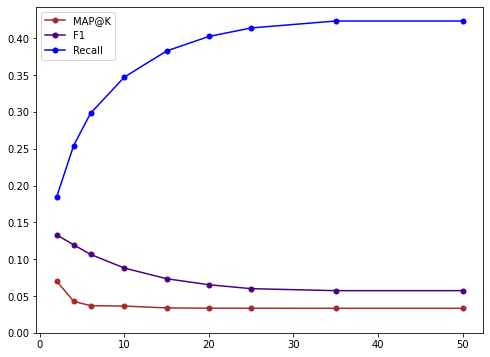

In [8]:
fig, ax = plt.subplots()

ax.plot(test_results_itemBased_df['K'], test_results_itemBased_df['MAP@K'], 
        label='MAP@K', 
        marker = 'o',
        markersize = 5,
        color = 'brown')

ax.plot(test_results_itemBased_df['K'], test_results_itemBased_df['F1'], 
        label='F1', 
        marker = 'o',
        markersize = 5,
        color = 'indigo')

ax.plot(test_results_itemBased_df['K'], test_results_itemBased_df['Recall'], 
        label='Recall', 
        marker = 'o',
        markersize = 5,
        color = 'blue')


fig.set_figwidth(8)
fig.set_figheight(6)

plt.ylim(bottom=0)
plt.legend()
plt.show()

In [47]:
#-------------------------------------------------------------------

In [9]:
test_results_userBased = [[2, 0.41471089093241487, 0.549138523451322, 0.8288968096080157, 2.880470822281167],
 [4, 0.32133370183286103, 0.4458922877137379, 0.8548758473327435, 4.366213527851459],
 [6, 0.27094689911865916, 0.3884657189543417, 0.8671152004126137, 5.686007957559681],
 [10, 0.2142101474747838, 0.3162862014799827, 0.8796336206896549, 8.03696949602122],
 [15, 0.18580008092182496, 0.2615730670762076, 0.888290229885057, 10.714522546419099],
 [20, 0.17216850247074683, 0.22665249851656355, 0.8937140804597695, 13.143899204244033],
 [25, 0.16209281946274728, 0.20022347475613267, 0.896560013262599, 15.656664456233422],
 [35, 0.15785343071185837, 0.18347793857665592, 0.8989104406130266, 17.79724801061008],
 [50, 0.15785343071185837, 0.18347793857665592, 0.8989104406130266, 17.79724801061008]]

test_results_userBased_df = pd.DataFrame(test_results_userBased, columns=['K', 'MAP@K', 'F1', 'Recall', 'Items_aver'])
test_results_userBased_df['Items_aver'] = round(test_results_userBased_df['Items_aver'])

In [10]:
# User-Based
test_results_userBased_df

,K,MAP@K,F1,Recall,Items_aver
0,2,0.414711,0.549139,0.828897,3.0
1,4,0.321334,0.445892,0.854876,4.0
2,6,0.270947,0.388466,0.867115,6.0
3,10,0.214210,0.316286,0.879634,8.0
4,15,0.185800,0.261573,0.888290,11.0
5,20,0.172169,0.226652,0.893714,13.0
6,25,0.162093,0.200223,0.896560,16.0
7,35,0.157853,0.183478,0.898910,18.0
8,50,0.157853,0.183478,0.898910,18.0


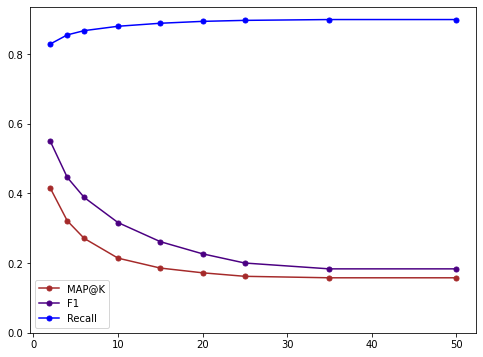

In [11]:
fig, ax = plt.subplots()

ax.plot(test_results_userBased_df['K'], test_results_userBased_df['MAP@K'], 
        label='MAP@K', 
        marker = 'o',
        markersize = 5,
        color = 'brown')

ax.plot(test_results_userBased_df['K'], test_results_userBased_df['F1'], 
        label='F1', 
        marker = 'o',
        markersize = 5,
        color = 'indigo')

ax.plot(test_results_userBased_df['K'], test_results_userBased_df['Recall'], 
        label='Recall', 
        marker = 'o',
        markersize = 5,
        color = 'blue')


fig.set_figwidth(8)
fig.set_figheight(6)

plt.ylim(bottom=0)
plt.legend()
plt.show()

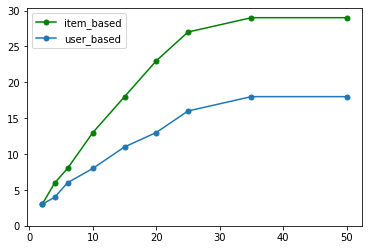

In [52]:
fig, ax = plt.subplots()

ax.plot(test_results_itemBased_df['K'], test_results_itemBased_df['Items_aver'], 
        label='item_based', 
        marker = 'o',
        markersize = 5,
        color = 'green')

ax.plot(test_results_userBased_df['K'], test_results_userBased_df['Items_aver'], 
        label='user_based', 
        marker = 'o',
        markersize = 5)


fig.set_figwidth(6)
fig.set_figheight(4)

plt.ylim(bottom=0)
plt.legend()
plt.show()
# Предлагаю рекомендовать всего десять товаров

## --------------------------------------------------------------------- Content-based

In [55]:
items_vector.head(5) # Вектора параметров товара, которые надо бы хранить

,sex_male,sex_female,size_small,size_middle,size_big,price,brand_Adidog,brand_Ani moll,brand_Arnydog,brand_BARSU,...,color_бежевый,color_белый,color_желтый,color_зеленый,color_коричневый,color_красный,color_оранжевый,color_розовый,color_синий,color_черный
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,0.064743,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0.109297,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0.109297,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,1,1,0.136503,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,1,1,0.246905,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# items.index = items['id']
# items = items.drop(columns = ['id'])

In [140]:
user_boughts = get_all_items_of_one_user(2)
user_boughts

[121]

In [141]:
i_list = []
for one_item_id in user_boughts:
    i_list.append(list(items.loc[one_item_id]))
i_list_df = pd.DataFrame(i_list)    
i_list_df.index = user_boughts
i_list_df.columns = items.columns

In [142]:
i_list_df #Список всех товаров, купленных пользователем

,id,Title,Brand,Type,Sex,Size,SizeParams,SizeArray,Color,Country,Price,Image
121,122,"PetBaronet / Комбинезон для собак ""Бостон"" с к...",PetBaronet,комбинезон,унисекс,для мелких пород; для средних пород,Российский размер;Размер производителя;Обхват ...,"XXL-большой,2XL,60,41;L-большой,L,48,33;M-боль...",красный,Китай,0.152275,images.wbstatic.net/c516x688/new/10220000/1022...


In [143]:
i_list_vector = get_vector(i_list_df) #Превратили в вектор
i_list_vector

,price,sex_male,sex_female,size_small,size_middle,size_big,brand_PetBaronet,type_комбинезон,color_красный
121,0.152275,1,1,1,1,0,1,1,1


In [144]:
personal_user_vector = []

for col in items_vector.columns:
    if col not in i_list_vector.columns:
        personal_user_vector.append(0)
    else:       
        val = round(i_list_vector[col].sum()/len(i_list_vector[col]), 3)
        personal_user_vector.append(val)

# Получили вектор предпочтений пользователя
# personal_user_vector.columns = items_vector.columns

In [128]:
getKnnItemsCB = GetKNearestNeighbours(items_vector, items['id'])

In [145]:
res = getKnn.neighbours_for_single_object(15, [personal_user_vector])
res

,id,dist
121,122,1.000000
54,55,0.925599
1144,1145,0.857652
1612,1613,0.857645
1433,1434,0.857609
1698,1699,0.857499
1639,1640,0.856835
291,292,0.847887
1397,1398,0.846759
1411,1412,0.802423


In [146]:
table = res.set_index('id').join(items.set_index('id'))
table.drop(['Title', 'SizeParams', 'SizeArray', 'Country', 'Image'], axis=1)

,dist,Brand,Type,Sex,Size,Color,Price
id,,,,,,,
122,1.000000,PetBaronet,комбинезон,унисекс,для мелких пород; для средних пород,красный,0.152275
55,0.925599,PetBaronet,комбинезон,унисекс,для мелких пород,салатовый,0.073417
1145,0.857652,ForMyDogs,комбинезон,унисекс,для мелких пород; для средних пород,"красный, золотистый",0.175459
1613,0.857645,ГЮ-ВАС,комбинезон,унисекс,для маленьких и средних пород; для мелких пород,малиновый,0.166470
1434,0.857609,ГЮ-ВАС,комбинезон,кабель; унисекс,для маленьких и средних пород; для мелких пород,малиновый,0.150698
1699,0.857499,Arnydog,комбинезон,самец; самка; унисекс,для мелких и средних пород; для средних; малый,красный,0.127277
1640,0.856835,Arnydog,комбинезон,самец; самка; унисекс,для мелких и средних пород; для средних; малый,красный,0.061588
292,0.847887,Mr&Mrs ТЯФ,комбинезон,унисекс,для мелких пород; для средних пород,"персиковый, коралловый, золотистый",0.585995
1398,0.846759,Mr&Mrs ТЯФ,комбинезон,унисекс,для мелких пород; для средних пород,"красный, перламутровый, бежевый",0.609652


In [32]:
user_boughts = get_all_items_of_one_user(8)

i_list = []
for one_item_id in user_boughts:
    i_list.append(list(items.loc[one_item_id]))
i_list_df = pd.DataFrame(i_list)    
i_list_df.index = user_boughts
i_list_df.columns = items.columns

i_list_vector = get_vector(i_list_df) #Превратили в вектор
i_list_vector

,price,sex_male,sex_female,size_small,size_middle,size_big,brand_DOGMODA,brand_ForMyDogs,brand_OSSO-fashion,type_дождевик,type_комбинезон,type_пакет,color_зеленый,color_красный,color_черный
20,0.136503,0,1,1,0,0,1,0,0,0,1,0,0,1,0
134,0.362274,0,1,0,1,1,0,1,0,1,0,0,0,0,1
164,0.108903,1,0,1,1,0,0,0,1,0,0,1,1,0,0


In [42]:
# personal_user_vector = []

# for col in items_vector.columns:
#     if col not in i_list_vector.columns:
#         personal_user_vector.append(0)
#     else:       
#         val = round(i_list_vector[col].sum()/len(i_list_vector[col]), 3)
#         personal_user_vector.append(val)

# getKnnItemsCB = GetKNearestNeighbours(items_vector, items['id'])    
res = getKnn.neighbours_for_single_object(15, [personal_user_vector])

table = res.set_index('id').join(items.set_index('id'))
table.drop(['Title', 'SizeParams', 'SizeArray', 'Country', 'Image'], axis=1)

,dist,Brand,Type,Sex,Size,Color,Price
id,,,,,,,
1220,0.788960,ForMyDogs,комбинезон,унисекс,для мелких пород; для средних пород,"черный, золотистый",0.190837
1775,0.788918,ForMyDogs,комбинезон,унисекс,для мелких пород; для средних пород,зеленый,0.189260
402,0.788805,ForMyDogs,комбинезон,унисекс,для мелких пород; для средних пород,светло-бирюзовый,0.185001
1145,0.788545,ForMyDogs,комбинезон,унисекс,для мелких пород; для средних пород,"красный, золотистый",0.175459
1448,0.788545,ForMyDogs,комбинезон,унисекс,для мелких пород; для средних пород,"черный, золотистый",0.175459
50,0.788335,DOGMODA,комбинезон,унисекс,для средних и малых пород,зеленый,0.168047
526,0.785869,DOGMODA,комбинезон,унисекс,для мелких пород; для средних пород,зеленый,0.093131
545,0.784082,OSSO-fashion,пакет,унисекс,для мелких пород; для средних пород,светло-бирюзовый,0.048103
156,0.782571,OSSO-fashion,пакет,унисекс,для мелких пород; для средних пород,светло-бирюзовый,0.013879


In [169]:
items.index = items['id']

def get_similar_for_personal_user(K, user_list):
    
    getKnnItemsCB = GetKNearestNeighbours(items_vector, items['id'])
    pred_items = []
    
    for user_id in user_list:
        user_boughts = get_all_items_of_one_user(user_id)
        print(user_id, end = '\r')
        
        i_list = []
        for one_item_id in user_boughts:
            i_list.append(list(items.loc[one_item_id]))
        i_list_df = pd.DataFrame(i_list)    
        i_list_df.index = user_boughts
        i_list_df.columns = items.columns
        
        i_list_vector = get_vector(i_list_df) #Превратили в вектор
        
        personal_user_vector = []
        for col in items_vector.columns:
            if col not in i_list_vector.columns:
                personal_user_vector.append(0)
            else:       
                val = round(i_list_vector[col].sum()/len(i_list_vector[col]), 3)
                personal_user_vector.append(val)
                
                
        res = getKnn.neighbours_for_single_object(K, [personal_user_vector]) 
        pred_items.append(list(res['id'])) 
        
    return pred_items   

In [255]:
items_in_acqs = items[items['id'].isin(acqs['itemId'])]
items_in_acqs = list(items_in_acqs['id'])

In [265]:
#-----------------------------------------

In [ ]:
def get_bbbb(K):
    bbbb=[]
    for item_list in bbbb_all:
        if len(item_list)<=K:
            bbbb.append(item_list)
        else:
            bbbb.append(item_list[0:K])
    return bbbb  

In [287]:
bbbb_all = get_similar_for_personal_user(70, user_item_matrix.index)

In [282]:
# test_result_CB = []

In [293]:
rem = 0
for item_list in bbbb_all:
    for item in item_list:
        if item not in items_in_acqs:
            rem+=1
            item_list.remove(item)
print(rem)            

0


In [299]:
K_list = [20, 30, 40, 50, 60, 70]

In [306]:
for k in K_list:
    
    print("\n\nk =", k, '---------------------------------')
    
    bbbb = get_bbbb(k)
    print('Ok\n')  

    f1 = count_f1_score(user_item_matrix, bbbb)
    print('\nF1 = ', f1)

    recall = count_recall_score(user_item_matrix, bbbb)
    print('\nRecall = ', recall)
    
    mor = count_MOR_score(user_item_matrix, bbbb)
    print('\nMor = ', mor)
    
    print('\n-----Res-----\n', k, mor, f1, recall, '\n------------------------')

    test_result_CB.append([k, mor, f1, recall])



k = 20 ---------------------------------
Ok

Total =  12448
12440
F1 =  0.13477675671819297
Total =  12448
12440
Recall =  0.9386246786632392
Total =  12448
12432
Mor =  0.9386246786632392

-----Res-----
 20 0.10045170767535797 0.13477675671819297 0.9386246786632392 
------------------------


k = 30 ---------------------------------
Ok

Total =  12448
12440
F1 =  0.0954573947951725
Total =  12448
12440
Recall =  0.9550878320479866
Total =  12448
12432
Mor =  0.9550878320479866

-----Res-----
 30 0.10045170767535797 0.0954573947951725 0.9550878320479866 
------------------------


k = 40 ---------------------------------
Ok

Total =  12448
12440
F1 =  0.074192311603528
Total =  12448
12440
Recall =  0.963956726649529
Total =  12448
12432
Mor =  0.963956726649529

-----Res-----
 40 0.10045170767535797 0.074192311603528 0.963956726649529 
------------------------


k = 50 ---------------------------------
Ok

Total =  12448
12440
F1 =  0.061410247990422065
Total =  12448
12440
Recall =

In [44]:
test_result_CB = [[10, 0.22663028916242464, 0.885571979434447],
 [20, 0.13477675671819297, 0.9386246786632392],
 [30, 0.0954573947951725, 0.9550878320479866],
 [40, 0.074192311603528, 0.963956726649529],
 [50, 0.061410247990422065, 0.9678663239074553],
 [60, 0.05475157302958656, 0.9713474721508144],
 [70, 0.05366063693103254, 0.9731362467866329]]

In [45]:
test_results_CB_df = pd.DataFrame(test_result_CB, columns=['K', 'F1', 'Recall'])

In [46]:
test_results_CB_df

,K,F1,Recall
0,10,0.226630,0.885572
1,20,0.134777,0.938625
2,30,0.095457,0.955088
3,40,0.074192,0.963957
4,50,0.061410,0.967866
5,60,0.054752,0.971347
6,70,0.053661,0.973136


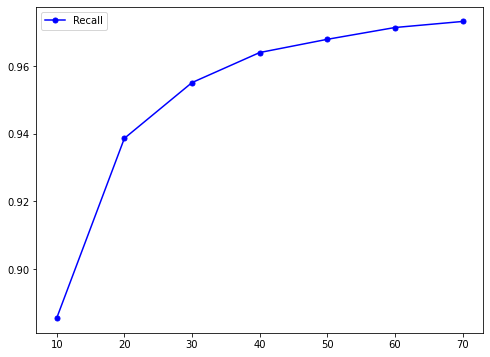

In [48]:
fig, ax = plt.subplots()

# ax.plot(test_results_CB_df['K'], test_results_CB_df['F1'], 
#         label='F1', 
#         marker = 'o',
#         markersize = 5,
#         color = 'indigo')

ax.plot(test_results_CB_df['K'], test_results_CB_df['Recall'], 
        label='Recall', 
        marker = 'o',
        markersize = 5,
        color = 'blue')


fig.set_figwidth(8)
fig.set_figheight(6)

# plt.ylim(bottom=0)
plt.legend()
plt.show()